Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
File already exists locally, skipping download: who_ambient_air_quality_2024_v6.1.xlsx
Available sheets: ['Readme', 'Metadata', 'Update 2024 (V6.1)']
Raw shape: (40098, 20)
Columns (sample): ['who_region', 'iso3', 'country_name', 'city', 'year', 'version', 'pm10_concentration', 'pm25_concentration', 'no2_concentration', 'pm10_tempcov', 'pm25_tempcov', 'no2_tempcov', 'type_of_stations', 'reference', 'web_link', 'population', 'population_source', 'latitude', 'longitude', 'who_ms']
Detected columns mapping (None means not found):
  iso3           -> iso3
  country_name   -> country_name
  city           -> city
  year           -> year
  pm10           -> pm10_concentration
  pm25           -> pm25_concentration
  no2            

,iso3,country_name,city,year,pm10_concentration,pm25_concentration,no2_concentration,latitude,longitude,population,version,type_of_stations
0,ESP,Spain,A Coruna/ESP,2013.0,23.238,11.491,28.841,43.367900,-8.418571,246146.0,"V4.0 (2018), V4.0 (2018), V4.0 (2018), V4.0 (2...","Urban, Urban, Suburban"
1,ESP,Spain,A Coruna/ESP,2014.0,27.476,15.878,19.575,43.368033,-8.418233,247604.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023)","Urban, Urban, Suburban"
2,ESP,Spain,A Coruna/ESP,2015.0,25.515,14.004,22.731,43.370375,-8.422900,247604.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...","Urban, Urban, Suburban, Suburban"
3,ESP,Spain,A Coruna/ESP,2016.0,23.057,13.160,20.204,43.370375,-8.422900,247604.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...","Urban, Urban, Suburban, Suburban"
4,ESP,Spain,A Coruna/ESP,2017.0,26.849,14.114,21.543,43.370375,-8.422900,247604.0,"V6.0 (2023), V6.0 (2023), V6.0 (2023), V6.0...","Urban, Urban, Suburban, Suburban"


Aggregated city-year shape: (36224, 8)


,country_name,city,year,pm10_concentration,pm25_concentration,latitude,longitude,population
0,Afghanistan,Kabul/AFG,2019.0,NaN,119.774,34.53581,69.19051,4221532.0
1,Albania,Durres/ALB,2014.0,13.854,7.742,41.31990,19.44920,181240.0
2,Albania,Durres/ALB,2015.0,17.648,12.595,41.31990,19.44920,181240.0
3,Albania,Durres/ALB,2016.0,24.559,14.323,41.31990,19.44920,181240.0
4,Albania,Durres/ALB,2017.0,25.516,14.670,41.31990,19.44920,181240.0


Years range: 2010 to 2022
Unique cities: 6520
Unique countries: 124


,country_name,pm10_concentration,pm25_concentration
0,Afghanistan,NaN,119.774000
1,Cameroon,103.666667,82.666667
2,Bangladesh,143.886467,77.247565
3,Mongolia,168.515200,73.556833
4,Tajikistan,NaN,71.517000
5,Uganda,170.400000,69.301500
6,India,102.593163,68.187384
7,Pakistan,273.931400,67.832091
8,Qatar,159.233286,54.076143
9,Bahrain,182.803643,53.405364


Top countries to plot: ['Afghanistan', 'Cameroon', 'Bangladesh', 'Mongolia', 'Tajikistan']


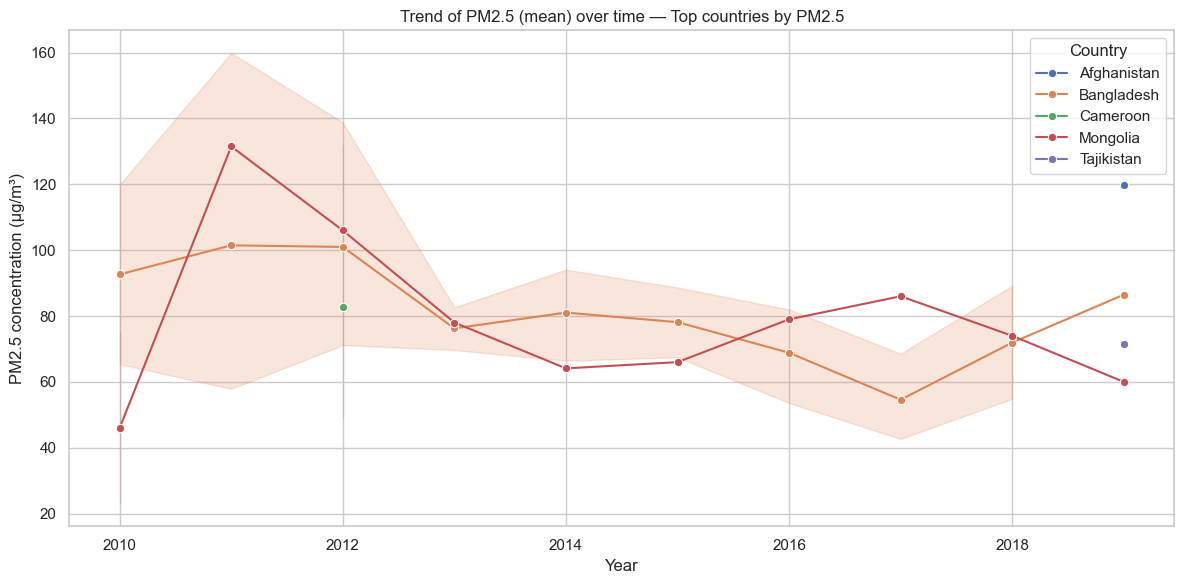

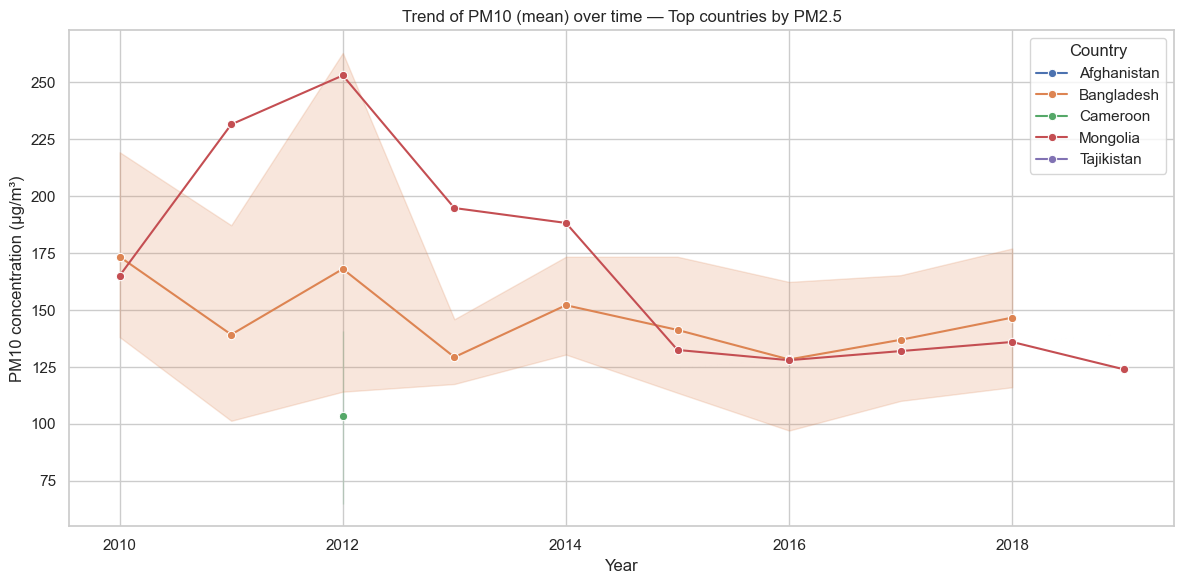

Top 15 cities by PM2.5 in 2022:


,country_name,city,pm25_concentration
2515,Bulgaria,Pernik/BGR,66.000
25761,Saudi Arabia,Eastern Region/SAU,48.200
25783,Saudi Arabia,Madinah Region/SAU,44.500
25809,Saudi Arabia,Royadh Region/SAU,41.600
25788,Saudi Arabia,Makkah Region/SAU,38.400
2636,Bulgaria,Veliko Tarnovo/BGR,35.900
2614,Bulgaria,Stara Zagora/BGR,34.600
25115,Romania,Baia Mare/ROU,29.827
15225,Greece,Volos/GRC,27.574
25104,Romania,Bacau/ROU,24.800


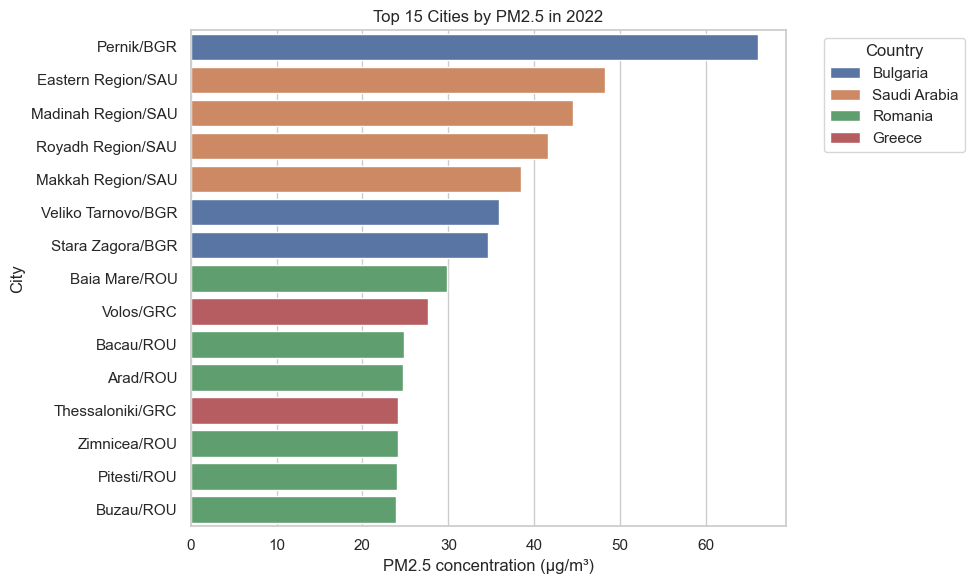

Saved PM2.5 heatmap: who_pm25_heatmap_2022.html


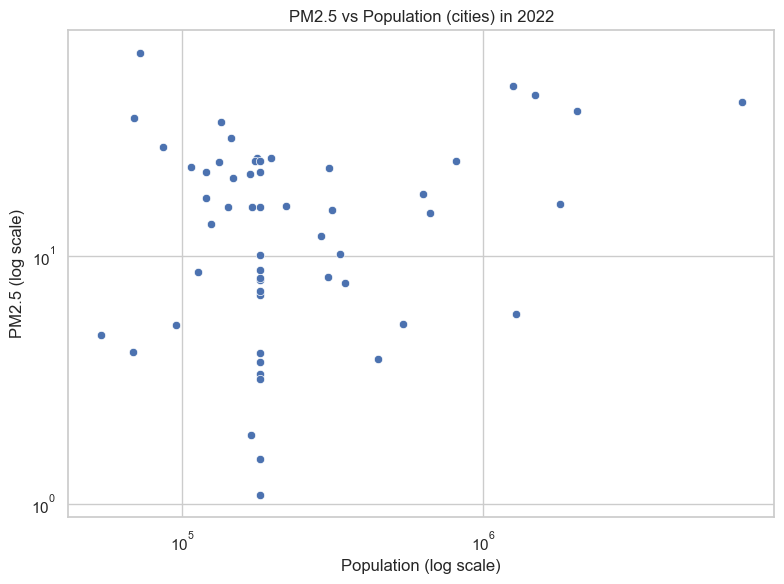

,pm10_concentration,pm25_concentration,population
pm10_concentration,1.000000,0.892750,0.275846
pm25_concentration,0.892750,1.000000,0.250666
population,0.275846,0.250666,1.000000


Saved aggregated CSVs: who_city_year_aggregated.csv, who_country_summary.csv (if available).
Notebook run completed.


In [12]:
# WHO Ambient Air Quality (v6.1) — Full Notebook Example
# NOTE: If running in Colab, ensure folium and other libs are installed.

# 0. Imports & settings
import os
import re
import warnings
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pip install seaborn folium matplotlib pandas
import seaborn as sns
import requests

# Interactive maps
import folium
from folium.plugins import HeatMap

sns.set(style="whitegrid")
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 120)

# 1. Download file if missing
url = (
    "https://cdn.who.int/media/docs/default-source/air-pollution-documents/"
    "air-quality-and-health/who_ambient_air_quality_database_version_2024_(v6.1).xlsx"
    "?sfvrsn=c504c0cd_3&download=true"
)
local_filename = "who_ambient_air_quality_2024_v6.1.xlsx"

if not os.path.exists(local_filename):
    print("File not found locally. Downloading via requests...")
    headers = {"User-Agent": "Mozilla/5.0"}  # mimic browser
    r = requests.get(url, headers=headers, stream=True)
    r.raise_for_status()  # will throw HTTPError if 403/404
    with open(local_filename, "wb") as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Download completed:", local_filename)
else:
    print("File already exists locally, skipping download:", local_filename)

xls = pd.ExcelFile(local_filename)
print("Available sheets:", xls.sheet_names)

# Use third sheet if you know that’s where the data is:
if len(xls.sheet_names) >= 3:
    sheet_name = xls.sheet_names[2]  # zero-based index 2 = 3rd sheet
else:
    # fallback: if there's a sheet called "Data"
    sheet_name = "Data" if "Data" in xls.sheet_names else xls.sheet_names[0]

df_raw = pd.read_excel(xls, sheet_name=sheet_name, dtype=object)  # load as object to inspect

print("Raw shape:", df_raw.shape)
print("Columns (sample):", list(df_raw.columns)[:30])

# 3. Helper: robust column matching (normalize names)
def normalize(col):
    c = str(col).strip().lower()
    c = re.sub(r"[^\w]+", "_", c)  # replace non-word chars with underscore
    c = re.sub(r"_+", "_", c).strip("_")
    return c

cols_normalized = {col: normalize(col) for col in df_raw.columns}
inverse_norm = defaultdict(list)
for orig, norm in cols_normalized.items():
    inverse_norm[norm].append(orig)

# Known candidate keys for columns we care about
candidates = {
    "iso3": ["iso3", "iso_3", "iso_3_code"],
    "country_name": ["country", "country_name", "countryname"],
    "city": ["city", "location", "site", "site_name"],
    "year": ["year", "measurement_year", "monitoring_year"],
    "pm10": ["pm10", "pm10_concentration", "pm10_concen", "pm10_concentration_ug_m3"],
    "pm25": ["pm25", "pm2_5", "pm2_5_concentration", "pm25_concentration", "pm25_concen"],
    "no2": ["no2", "no2_concentration", "no2_concen"],
    "latitude": ["latitude", "lat"],
    "longitude": ["longitude", "lon", "lng", "long"],
    "population": ["population", "pop", "population_total"],
    "version": ["version"],
    "type_of_station": ["type_of_station", "type_of_stations", "station_type"],
}

# Find best matching original column names
found = {}
available_norms = set(cols_normalized.values())
for key, cand_list in candidates.items():
    found_col = None
    for cand in cand_list:
        if cand in available_norms:
            # pick original name corresponding to this normalized name
            found_col = inverse_norm[cand][0]
            break
    # fallback: try substring match in normalized names
    if not found_col:
        for norm_name, origs in inverse_norm.items():
            for cand in cand_list:
                if cand in norm_name and origs:
                    found_col = origs[0]
                    break
            if found_col:
                break
    found[key] = found_col

print("Detected columns mapping (None means not found):")
for k, v in found.items():
    print(f"  {k:14s} -> {v}")

# 4. Keep available columns and create cleaned DataFrame
keep_cols = [v for v in found.values() if v is not None]
df = df_raw[keep_cols].copy()
df.columns = [normalize(c) for c in df.columns]  # normalized column names for convenience

# Replace common 'NA' string tokens with actual NaN
df.replace(["NA", "N/A", "na", "n/a", ""], np.nan, inplace=True)

# 5. Convert numeric columns robustly (remove commas, stray chars)
num_cols = []
for cand in ["pm10", "pm25", "no2", "latitude", "longitude", "population", "year"]:
    # normalized name used earlier
    matches = [c for c in df.columns if cand in c]
    for m in matches:
        num_cols.append(m)
        df[m] = (
            df[m]
            .astype(str)
            .str.replace(",", "")
            .str.replace(r"[^\d\.\-eE]", "", regex=True)
            .replace("", np.nan)
        )
        df[m] = pd.to_numeric(df[m], errors="coerce")

# If year isn't numeric, try extracting 4-digit year from text
if "year" in df.columns:
    if not np.issubdtype(df["year"].dtype, np.number):
        df["year"] = df["year"].astype(str).str.extract(r"(\d{4})")[0]
        df["year"] = pd.to_numeric(df["year"], errors="coerce")

# 6. Drop rows where both PM10 and PM2.5 are missing (no pollutant info)
pm10_col = next((c for c in df.columns if "pm10" in c), None)
pm25_col = next((c for c in df.columns if "pm25" in c), None)

if pm10_col and pm25_col:
    before = df.shape[0]
    df = df.dropna(subset=[pm10_col, pm25_col], how="all")
    after = df.shape[0]
    print(f"Dropped {before - after} rows with neither PM10 nor PM2.5.")

# 7. Basic type fixes & fill population median if missing
if "population" in df.columns:
    df["population"] = df["population"].fillna(df["population"].median())

# Keep a cleaned copy and save
clean_csv = "who_air_quality_cleaned.csv"
df.to_csv(clean_csv, index=False)
print("Saved cleaned CSV:", clean_csv)
print("Cleaned shape:", df.shape)
display(df.head(5))

# 8. Aggregate per country / city-year (since there may be multiple stations)
group_cols = []
if "country_name" in df.columns:
    group_cols.append("country_name")
if "city" in df.columns:
    group_cols.append("city")
if "year" in df.columns:
    group_cols.append("year")

agg_dict = {}
if pm10_col:
    agg_dict[pm10_col] = "mean"
if pm25_col:
    agg_dict[pm25_col] = "mean"
if "latitude" in df.columns:
    agg_dict["latitude"] = "first"
if "longitude" in df.columns:
    agg_dict["longitude"] = "first"
if "population" in df.columns:
    agg_dict["population"] = "first"

if group_cols and agg_dict:
    df_city_year = df.groupby(group_cols).agg(agg_dict).reset_index()
    print("Aggregated city-year shape:", df_city_year.shape)
    display(df_city_year.head(5))
else:
    df_city_year = df.copy()

# 9. Summary statistics
print("Years range:", int(df_city_year["year"].min()), "to", int(df_city_year["year"].max()))
print("Unique cities:", df_city_year["city"].nunique() if "city" in df_city_year.columns else "N/A")
print("Unique countries:", df_city_year["country_name"].nunique() if "country_name" in df_city_year.columns else "N/A")

# Top countries by average PM2.5/PM10
if "country_name" in df_city_year.columns and pm25_col and pm10_col:
    country_summary = (
        df_city_year.groupby("country_name")[[pm10_col, pm25_col]]
        .mean()
        .sort_values(by=pm25_col, ascending=False)
        .reset_index()
    )
    display(country_summary.head(10))

# 10. Time-series trends (select countries or top N by avg PM2.5)
if "country_name" in df_city_year.columns and pm25_col:
    # pick top 5 countries by mean PM2.5
    top_countries = country_summary.nlargest(5, pm25_col)["country_name"].tolist()
    print("Top countries to plot:", top_countries)

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_city_year[df_city_year["country_name"].isin(top_countries)],
        x="year",
        y=pm25_col,
        hue="country_name",
        estimator="mean",
        marker="o",
    )
    plt.title("Trend of PM2.5 (mean) over time — Top countries by PM2.5")
    plt.ylabel("PM2.5 concentration (µg/m³)")
    plt.xlabel("Year")
    plt.legend(title="Country")
    plt.tight_layout()
    plt.show()

    # PM10 trend as well
    if pm10_col:
        plt.figure(figsize=(12, 6))
        sns.lineplot(
            data=df_city_year[df_city_year["country_name"].isin(top_countries)],
            x="year",
            y=pm10_col,
            hue="country_name",
            estimator="mean",
            marker="o",
        )
        plt.title("Trend of PM10 (mean) over time — Top countries by PM2.5")
        plt.ylabel("PM10 concentration (µg/m³)")
        plt.xlabel("Year")
        plt.legend(title="Country")
        plt.tight_layout()
        plt.show()

# 11. Top cities by PM2.5 for latest year
if pm25_col and "year" in df_city_year.columns:
    latest_year = int(df_city_year["year"].max())
    df_latest = df_city_year[df_city_year["year"] == latest_year].dropna(subset=[pm25_col])
    top_cities = df_latest.sort_values(by=pm25_col, ascending=False).head(15)
    print(f"Top 15 cities by PM2.5 in {latest_year}:")
    display(top_cities[[c for c in ["country_name", "city", pm25_col] if c in top_cities.columns]])

    # Horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=top_cities,
        y="city" if "city" in top_cities.columns else top_cities.index,
        x=pm25_col,
        hue="country_name" if "country_name" in top_cities.columns else None,
        dodge=False,
    )
    plt.title(f"Top 15 Cities by PM2.5 in {latest_year}")
    plt.xlabel("PM2.5 concentration (µg/m³)")
    plt.ylabel("City")
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

# 12. Heatmap (folium) for latest year — PM2.5
if pm25_col and "latitude" in df_city_year.columns and "longitude" in df_city_year.columns and "year" in df_city_year.columns:
    df_map = df_latest.dropna(subset=["latitude", "longitude", pm25_col])
    heat_data = df_map[["latitude", "longitude", pm25_col]].values.tolist()

    m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB positron")
    HeatMap(heat_data, radius=8, max_zoom=6).add_to(m)

    map_filename = f"who_pm25_heatmap_{latest_year}.html"
    m.save(map_filename)
    print("Saved PM2.5 heatmap:", map_filename)
    display(m)  # will show in Jupyter

# 13. Scatter: population vs PM2.5 (latest year)
if pm25_col and "population" in df_latest.columns:
    df_scatter = df_latest.dropna(subset=["population", pm25_col])
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_scatter, x="population", y=pm25_col)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Population (log scale)")
    plt.ylabel("PM2.5 (log scale)")
    plt.title(f"PM2.5 vs Population (cities) in {latest_year}")
    plt.tight_layout()
    plt.show()

# 14. Quick correlation table
if pm10_col and pm25_col:
    corr_cols = [c for c in [pm10_col, pm25_col, "population"] if c in df_city_year.columns]
    display(df_city_year[corr_cols].corr())

# 15. Save important outputs (cleaned, aggregated, summaries)
df_city_year.to_csv("who_city_year_aggregated.csv", index=False)
if "country_name" in df_city_year.columns:
    country_summary.to_csv("who_country_summary.csv", index=False)

print("Saved aggregated CSVs: who_city_year_aggregated.csv, who_country_summary.csv (if available).")
print("Notebook run completed.")
